# Phys 404- Spring 2021
## Homework #7
### Ryan Schauer, 3/7/2021

### Burger's equation

In real-world applications, the advection velocity $v$ is usually variable.  For example,

\begin{equation}
\frac{\partial U}{\partial t}+U\frac{\partial U}{\partial x}=0.
\end{equation}

This is called Burger's equation, where the advection velocity depends on the property being advected, i.e., $U$.

1)Let's try the upwind method to solve this equation with an initial Gaussian profile. (U before $\frac{\partial U}{\partial x}$ is velocity at n and j)

2)Please experiment with different grid sizes.

3)Now the solution develops a non-symmetric profile over time.  Can you explain why?

In [21]:
"""
    
    Initial code copied from Lect10-pre.ipynb (https://github.com/zhuzh1983/computational-physics-class-404-604-Spring-2021/blob/main/Lect10-pre.ipynb)
    
"""

# Burger's equation:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def burger(xmin, xmax, Nx, tend, dtout):
    # Set up the grid.
    x = np.linspace(xmin, xmax, Nx)
    dx = (xmax - xmin) / (Nx - 1)
    dt = 0.8 * dx
    U = np.zeros(Nx,)

    # Give the initial profile.
    t = 0.0
    U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

    # Prepare for 3D outputs.
    tp = [t]
    Up = np.copy(U)

    # Initiate the plot.
    fig = plt.figure(figsize=(16,10))
    ax = fig.gca()
    ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
    ax.set_xlabel(r"Position $x$")
    ax.set_ylabel(r"$U(t,x)$")
    ax.minorticks_on()

    # Begin the simulation.
    tout = t + dtout
    while t < tend:

        # Backup the previous time step.
        Uold = np.copy(U)

        # Step through 
        for ix in range(1, Nx - 1):

            # Initializes vel as U
            vel = U[ix]
            if vel > 0:
                U[ix]=Uold[ix]-vel*dt*(Uold[ix]-Uold[ix-1])/dx
            else:
                U[ix]=Uold[ix]-vel*dt*(Uold[ix+1]-Uold[ix])/dx

        t += dt

        # Save the data after every dtout.
        if t >= tout:
            plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
            tp.append(t)
            Up = np.vstack((Up, U))
            print("t = ", t)
            tout += dtout

    ax.legend()

    # Create 3D-view of the solution.
    t, x = np.meshgrid(tp, x)
    fig3D = plt.figure(figsize=(16,16))
    ax3D = Axes3D(fig3D)
    ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
    ax3D.set_xlabel("Time $t$")
    ax3D.set_ylabel("Position $x$")
    ax3D.set_zlabel(r"$U(t,x)$")

    print("Done.")
    plt.show()

## Part 1
\
1)Let's try the upwind method to solve this equation with an initial Gaussian profile. (U before $\frac{\partial U}{\partial x}$ is velocity at n and j)


## Nx = 101 (Original grid size)

t =  1.12
t =  2.080000000000001
t =  3.040000000000002
t =  4.000000000000003
t =  5.120000000000004
t =  6.0800000000000045
t =  7.040000000000005
t =  8.000000000000005
t =  9.120000000000006
t =  10.080000000000007
Done.


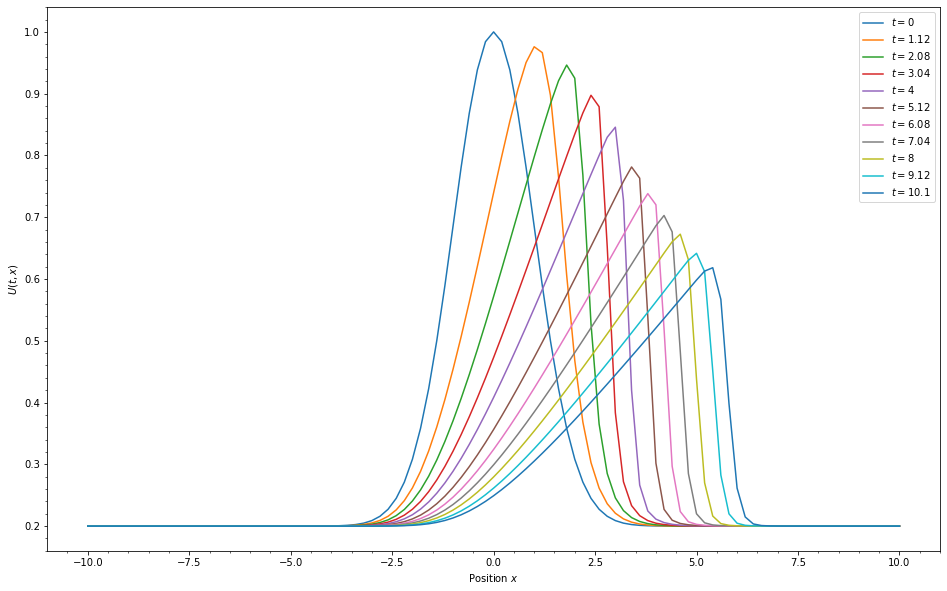

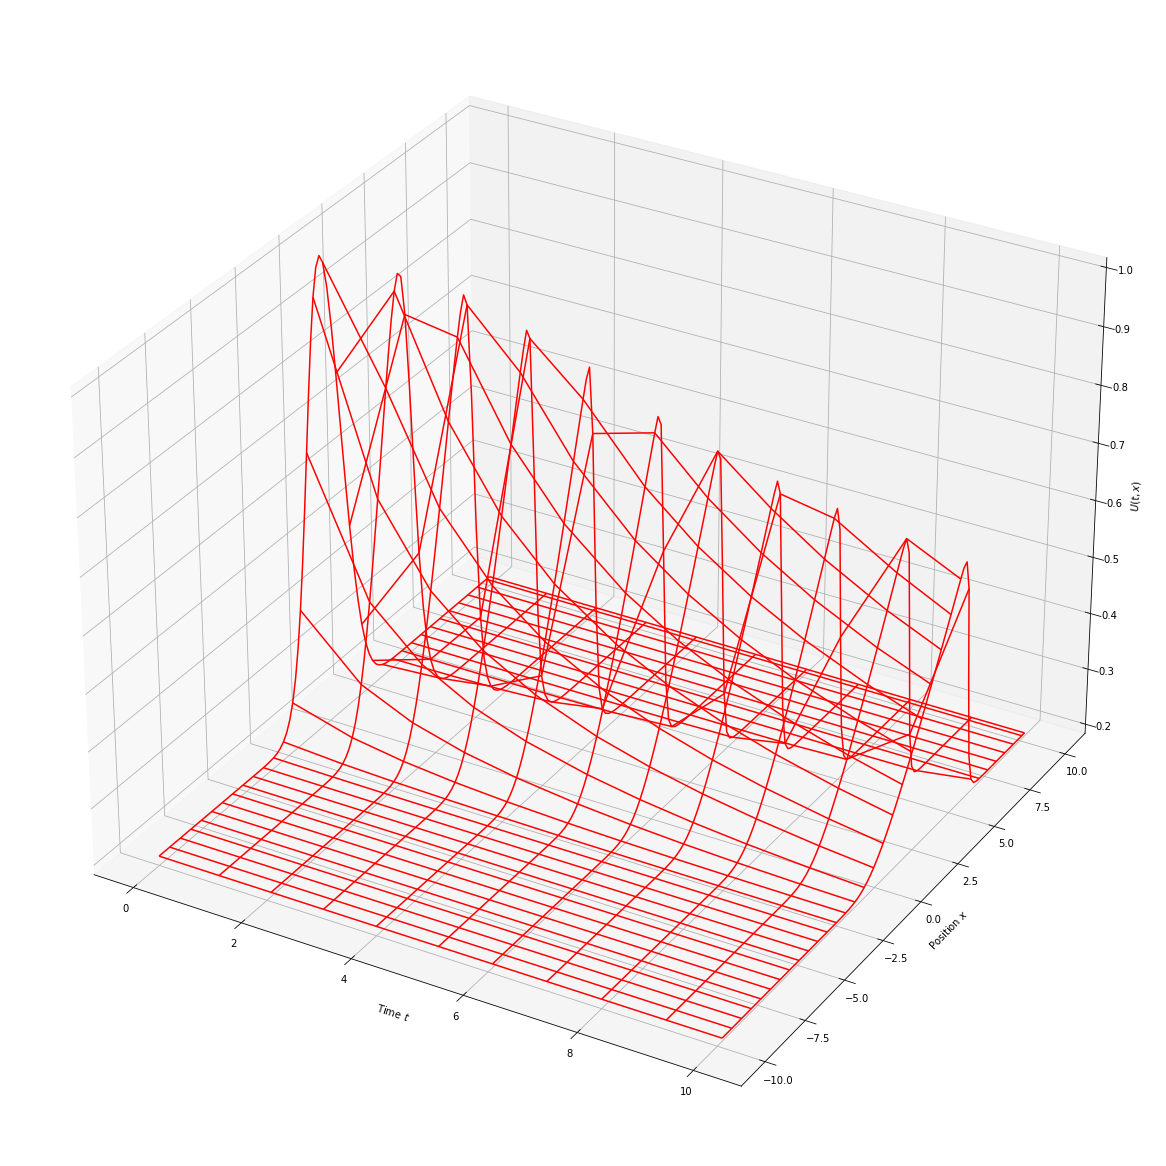

In [15]:
# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 10.0    # end time
dtout = 1.0   # time interval for outputs

burger(xmin, xmax, Nx, tend, dtout)

## Part 2
\
2)Please experiment with different grid sizes.

## Nx = 201

t =  1.0400000000000005
t =  2.0000000000000013
t =  3.0400000000000023
t =  4.000000000000003
t =  5.040000000000004
t =  6.000000000000004
t =  7.040000000000005
t =  8.000000000000005
t =  9.040000000000006
t =  10.000000000000007
Done.


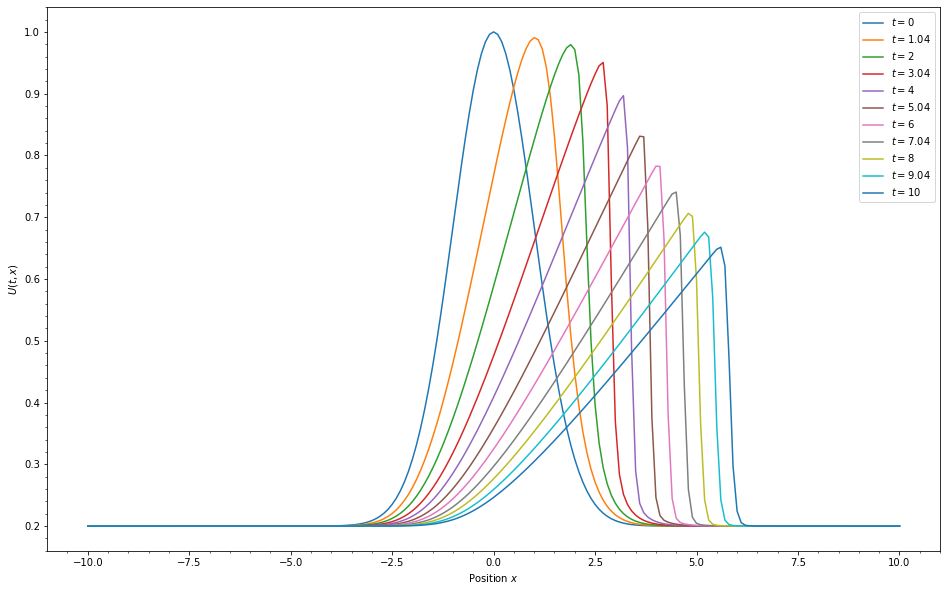

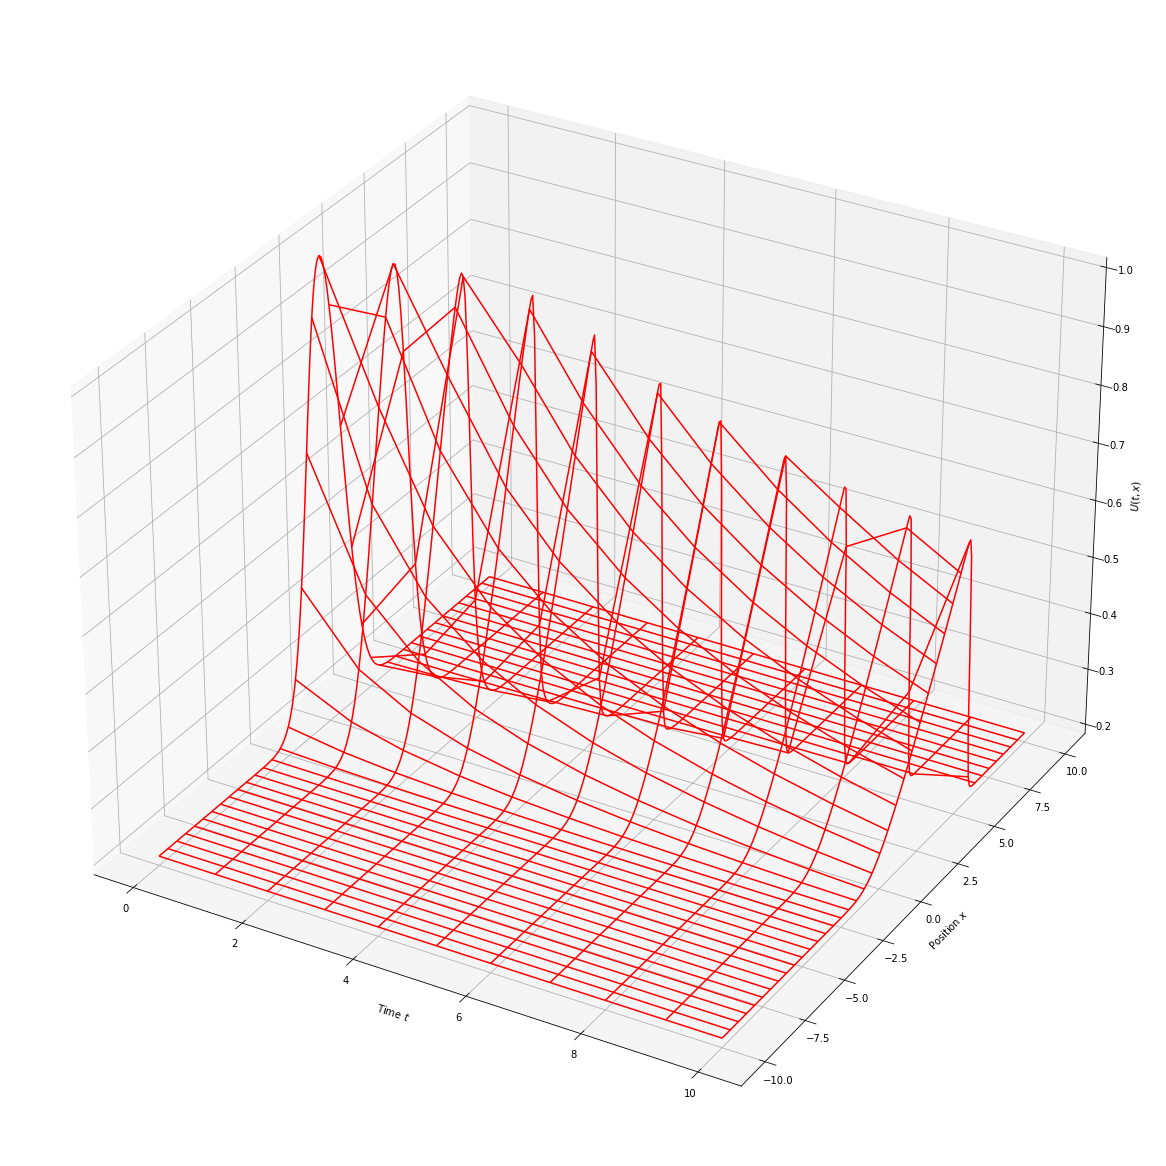

In [17]:
# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 201      # Larger grid than previously
tend = 10.0    # end time
dtout = 1.0   # time interval for outputs

burger(xmin, xmax, Nx, tend, dtout)

## Nx = 51

t =  1.2800000000000002
t =  2.24
t =  3.200000000000001
t =  4.160000000000002
t =  5.120000000000003
t =  6.080000000000004
t =  7.0400000000000045
t =  8.000000000000005
t =  9.280000000000006
t =  10.240000000000007
Done.


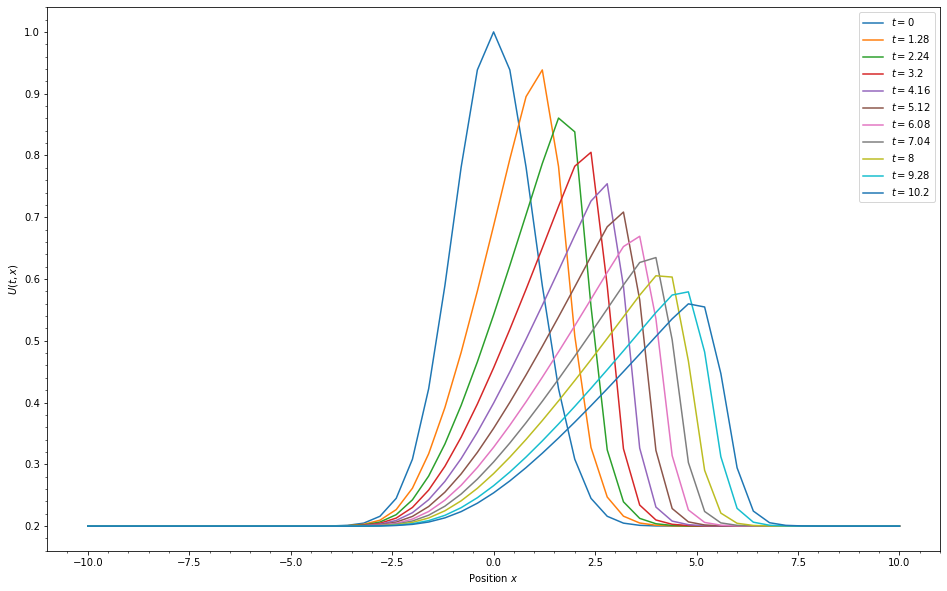

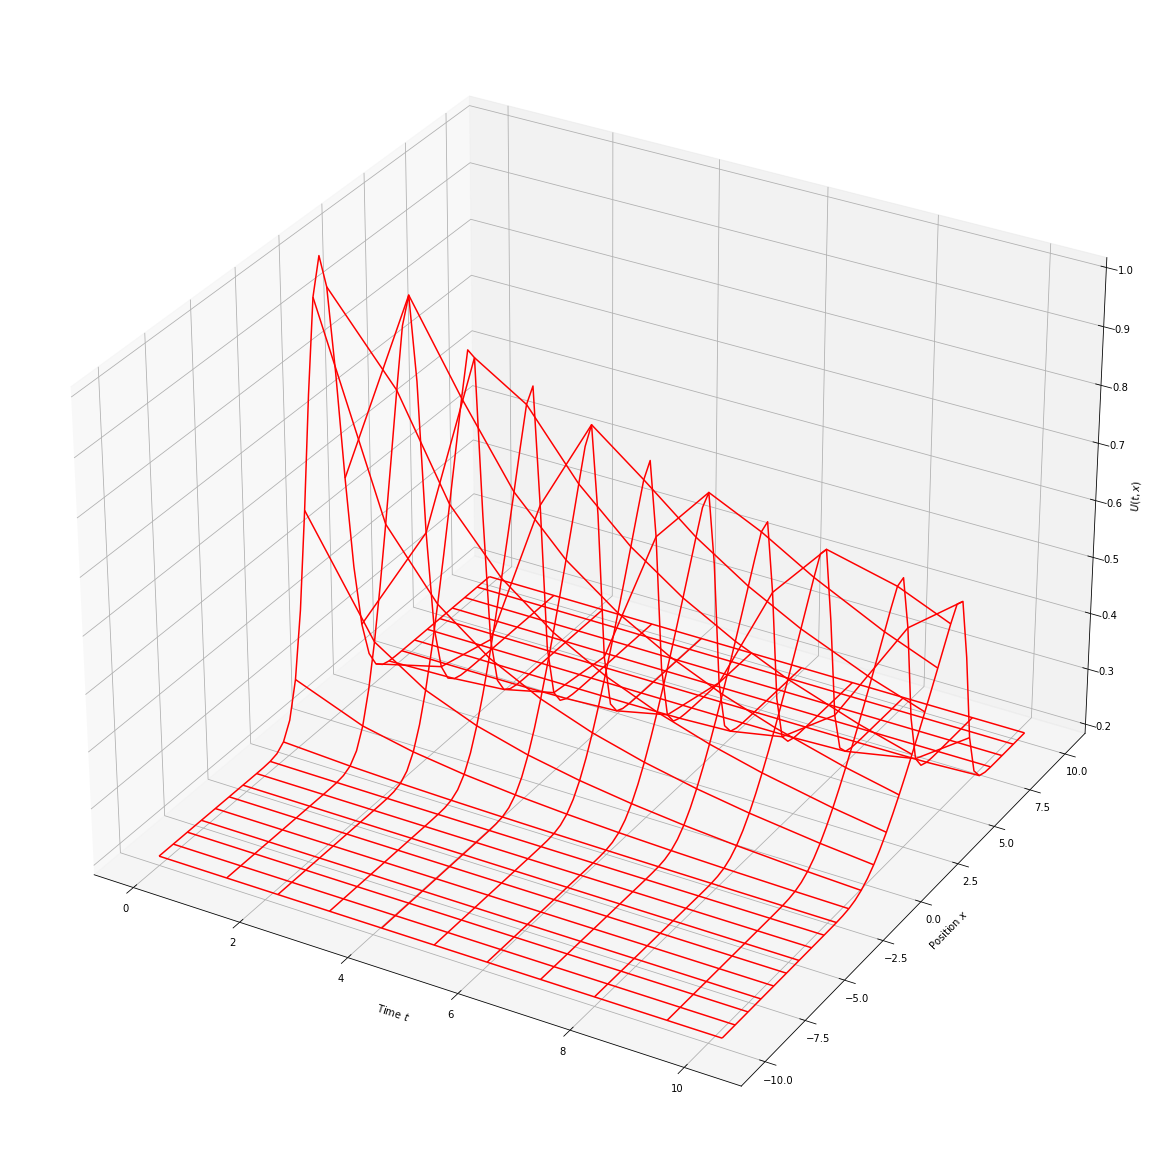

In [18]:
# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 51      # Smaller grid than originally
tend = 10.0    # end time
dtout = 1.0   # time interval for outputs

burger(xmin, xmax, Nx, tend, dtout)

## Nx = 21

t =  1.6
t =  2.4000000000000004
t =  3.2
t =  4.0
t =  5.6
t =  6.3999999999999995
t =  7.199999999999999
t =  8.799999999999999
t =  9.6
t =  10.4
Done.


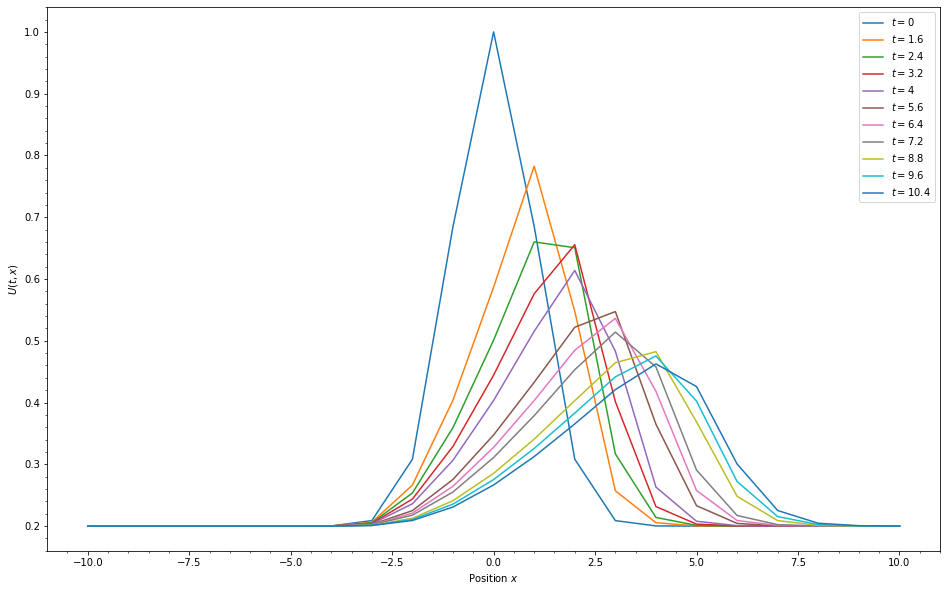

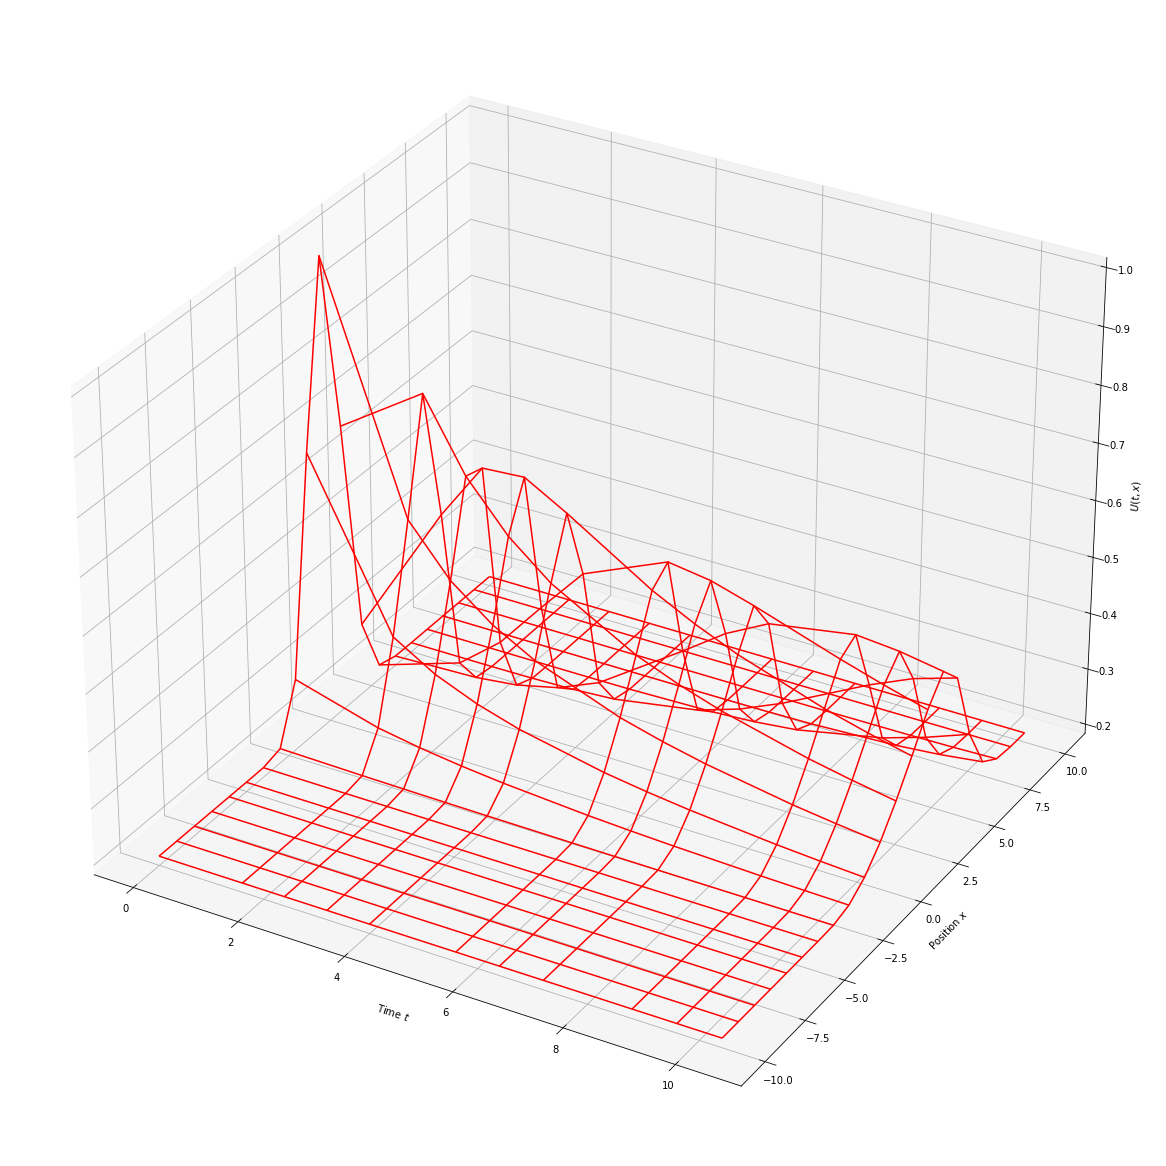

In [19]:
# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 21      # Much smaller grid than originally
tend = 10.0    # end time
dtout = 1.0   # time interval for outputs

burger(xmin, xmax, Nx, tend, dtout)

## Nx=1001

t =  1.0080000000000007
t =  2.0000000000000013
t =  3.0080000000000022
t =  4.000000000000003
t =  5.008000000000004
t =  6.000000000000004
t =  7.008000000000005
t =  8.000000000000005
t =  9.008000000000006
t =  10.000000000000007
Done.


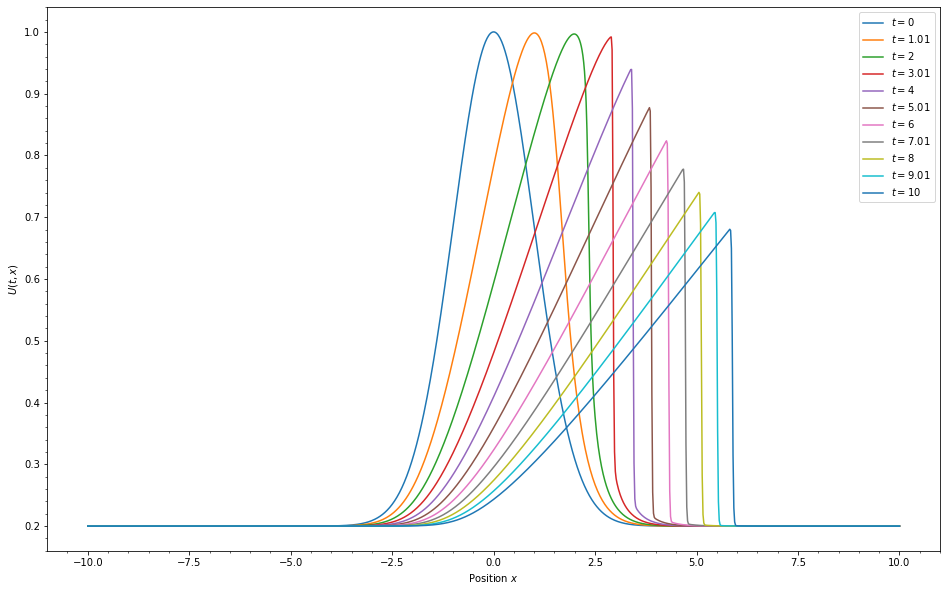

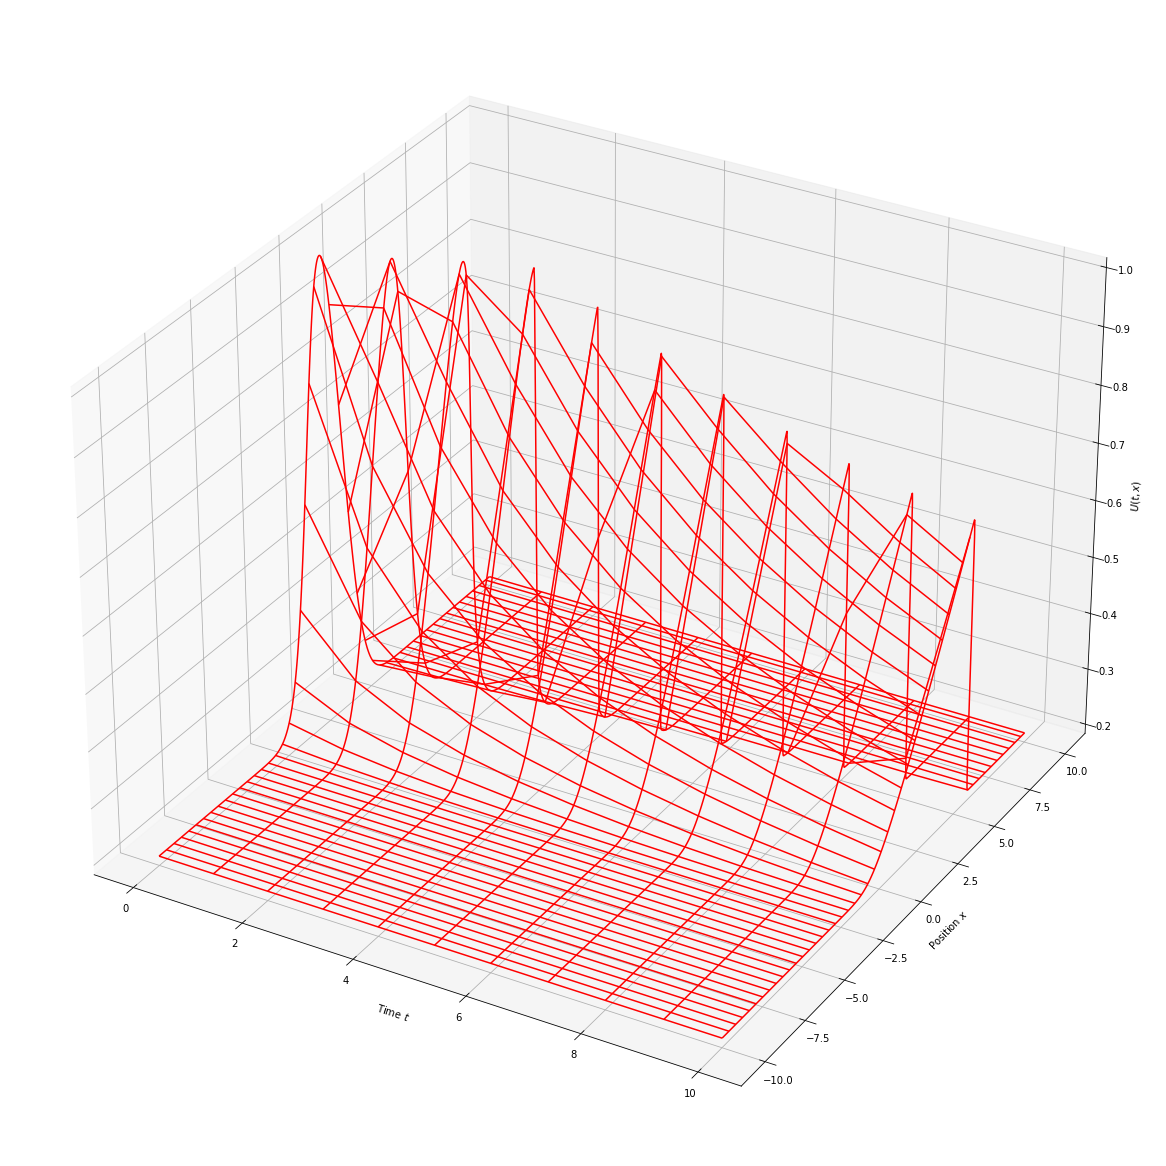

In [20]:
# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 1001      # Much larger grid than originally
tend = 10.0    # end time
dtout = 1.0   # time interval for outputs

burger(xmin, xmax, Nx, tend, dtout)

## Part 3
\
3)Now the solution develops a non-symmetric profile over time.  Can you explain why?
\
\
The value of U[ix] is not fixed over time. The present U[ix] will have been determined from the previous U[ix], which in turn was determined from the previous U[ix]. This continues to the beginning. This drives the wave forward but also causing it to shift away from a symmetrical shape.